Fig. 1: Command pattern
-----------------------

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../../3_code/")
import cstools

resolution = 101 # ms (temporal resolution)
offtime = 8 # ms
n_frames = 1
n_patterns = 10
min_z = 0 # µm
max_z = 10 # µm

In [10]:
b=cstools.generate_fourier_basis(resolution, n_patterns+1, sample=False, oldmethod=True)
b_trad = np.eye(resolution)
print b.shape

(10, 101)


## Compressed scheme
### Measurement matrix

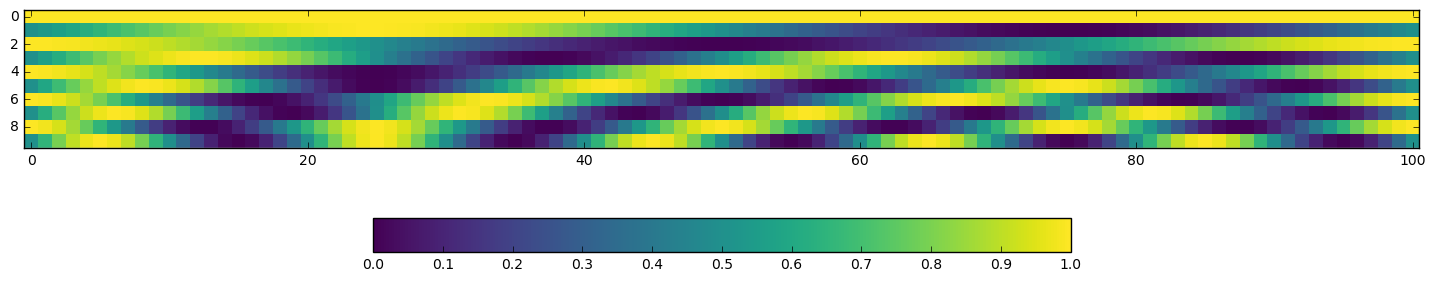

In [3]:
plt.figure(figsize=(18,6))
plt.imshow(b, interpolation='none', cmap='viridis')
plt.colorbar(orientation='horizontal', shrink=.5)
plt.savefig("1.Amatrix.png", dpi=300)

### Camera pattern

In [50]:
## Function definitions
def generate_z(n_frames, n_patterns, resolution, min_z, max_z, alternate=True):
    ramp = np.linspace(min_z, max_z, resolution, endpoint=True)
    if alternate:
        ramp_full = np.hstack((ramp, ramp[::-1]))
    else:
        ramp_full = np.hstack((ramp, ramp))
    return np.tile(ramp_full, n_frames*n_patterns/2)

def generate_ztrad(n_frames, n_patterns, resolution, min_z, max_z, alternate=True):
    ramp = np.linspace(min_z, max_z, n_patterns, endpoint=True)
    return np.repeat(ramp, resolution)

def generate_aotf(pattern, n_frames):
    return np.tile(pattern.flatten(), n_frames)

def generate_camera(n_patterns, n_frames, resolution):
    return np.repeat(np.arange(1, n_frames*n_patterns+1), resolution)

def generate_camera2(n_patterns, n_frames, resolution):
    return np.ones(n_patterns*n_frames*resolution)

def generate_ticks(n_patterns, n_frames, resolution):
    oneframe = np.zeros(n_patterns*resolution)
    oneframe[-1] = 1
    return np.tile(oneframe, n_frames)

def generate_ticks2(n_patterns, n_frames, resolution):
    oneframe = np.zeros(resolution)
    oneframe[-1] = 1
    return np.tile(oneframe, n_frames*n_patterns)

def off_time(in_signal, resolution, offtime):
    n_repeats = in_signal.shape[0]/resolution
    out = np.zeros(in_signal.shape[0]+offtime*n_repeats)
    for i in range(n_repeats):
        out[(i*(resolution+offtime)):(resolution+i*(resolution+offtime))]=in_signal[(i*resolution):((i+1)*resolution)]
    return out

In [51]:
zpos = off_time(generate_z(n_frames, n_patterns, resolution, min_z, max_z, alternate=False), resolution, offtime)
aotf = off_time(generate_aotf(b, n_frames), resolution, offtime)
camr = off_time(generate_camera2(n_patterns, n_frames, resolution), resolution, offtime)
tick = off_time(generate_ticks(n_patterns, n_frames, resolution), resolution, offtime)
tic2 = off_time(generate_ticks2(n_patterns, n_frames, resolution), resolution, offtime)

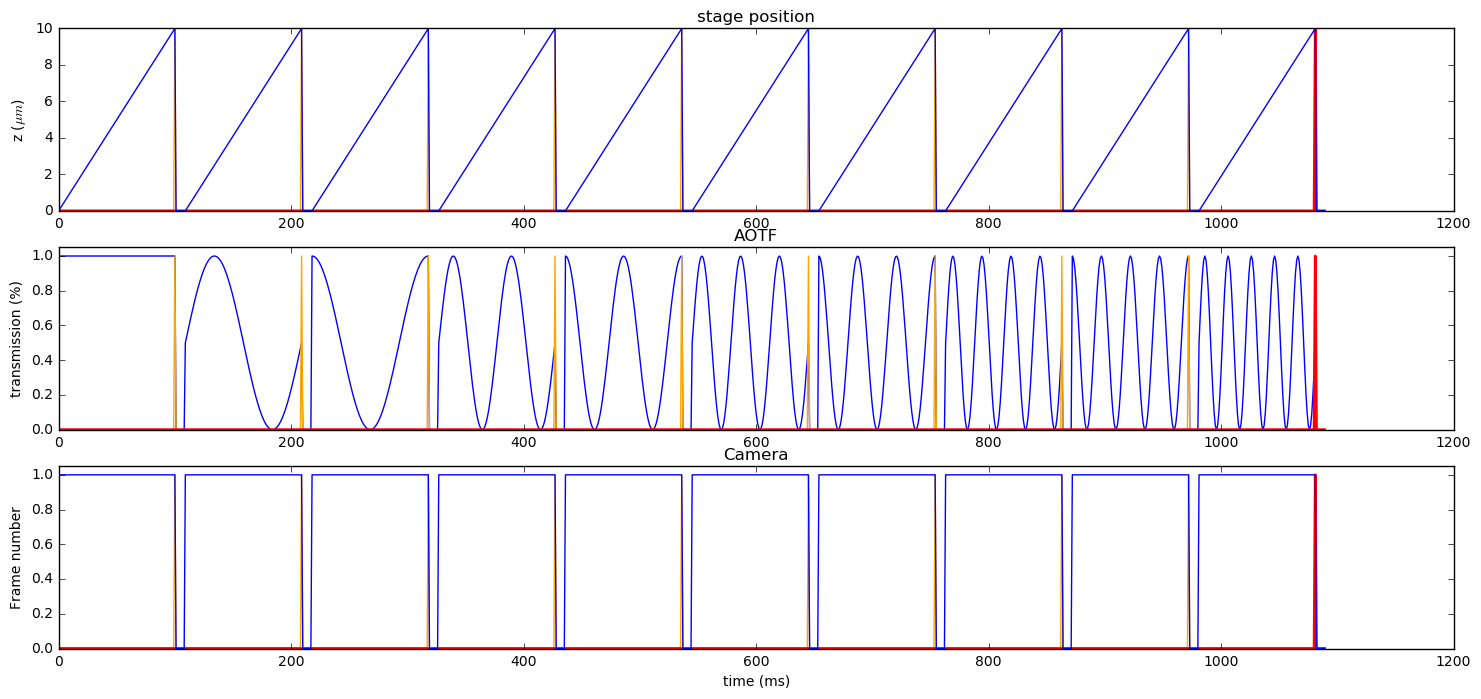

In [52]:
plt.figure(figsize=(18,8))

plt.subplot(3, 1, 1)
plt.plot(tic2*(zpos.max()-zpos.min())+zpos.min(), color='orange', linewidth=1)
plt.plot(tick*(zpos.max()-zpos.min())+zpos.min(), color='red', linewidth=2)
plt.plot(zpos)
plt.title('stage position')
plt.ylabel('z ($\mu m$)')
plt.ylim((min_z, max_z))

plt.subplot(3,1,2)
plt.plot(aotf)
plt.plot(tic2, color='orange', linewidth=1)
plt.plot(tick, color='red', linewidth=2)
plt.ylim((0,1.05))
plt.title('AOTF')
plt.ylabel('transmission (%)')

plt.subplot(3,1,3)
plt.plot(tic2*(camr.max()-camr.min())+camr.min(), color='orange', linewidth=1)
plt.plot(tick*(camr.max()-camr.min())+camr.min(), color='red', linewidth=2)
plt.plot(camr)
plt.ylim((0,1.05))
plt.title('Camera')
plt.ylabel('Frame number')

plt.xlabel('time (ms)')

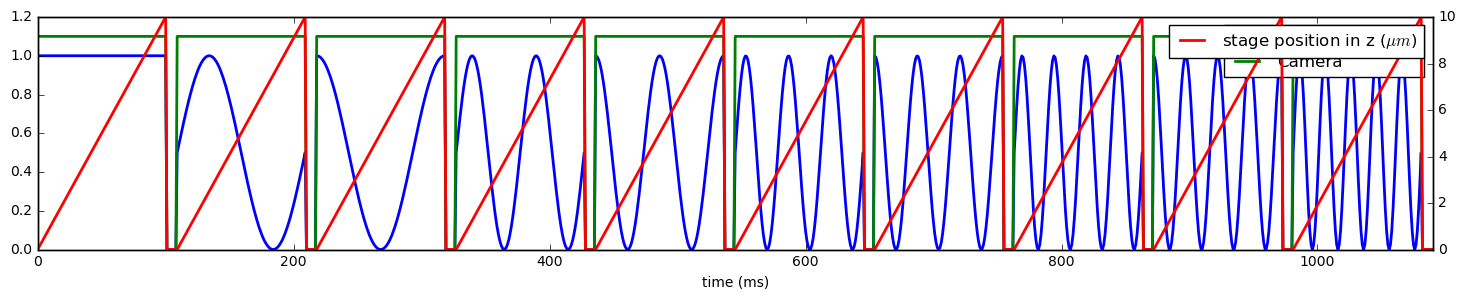

In [53]:
fig, ax1 = plt.subplots(figsize=(18,3))
ax2 = ax1.twinx()

ax1.plot(aotf, linewidth=2, label='transmission (%)')
ax1.plot(camr*1.1, linewidth=2, label='Camera')
ax2.plot(zpos, linewidth=2, color='red', label='stage position in z ($\mu m$)')

plt.xlim((0,camr.shape[0]))
#plt.ylim((0,1.2))
#plt.plot(tic2*(zpos.max()-zpos.min())+zpos.min(), color='orange', linewidth=1)
#plt.plot(tick*(zpos.max()-zpos.min())+zpos.min(), color='red', linewidth=2)
ax1.set_xlabel('time (ms)')
ax1.legend()
ax2.legend()

plt.savefig("./1.Pattern.pdf")

## Traditional scheme
### Measurement matrix

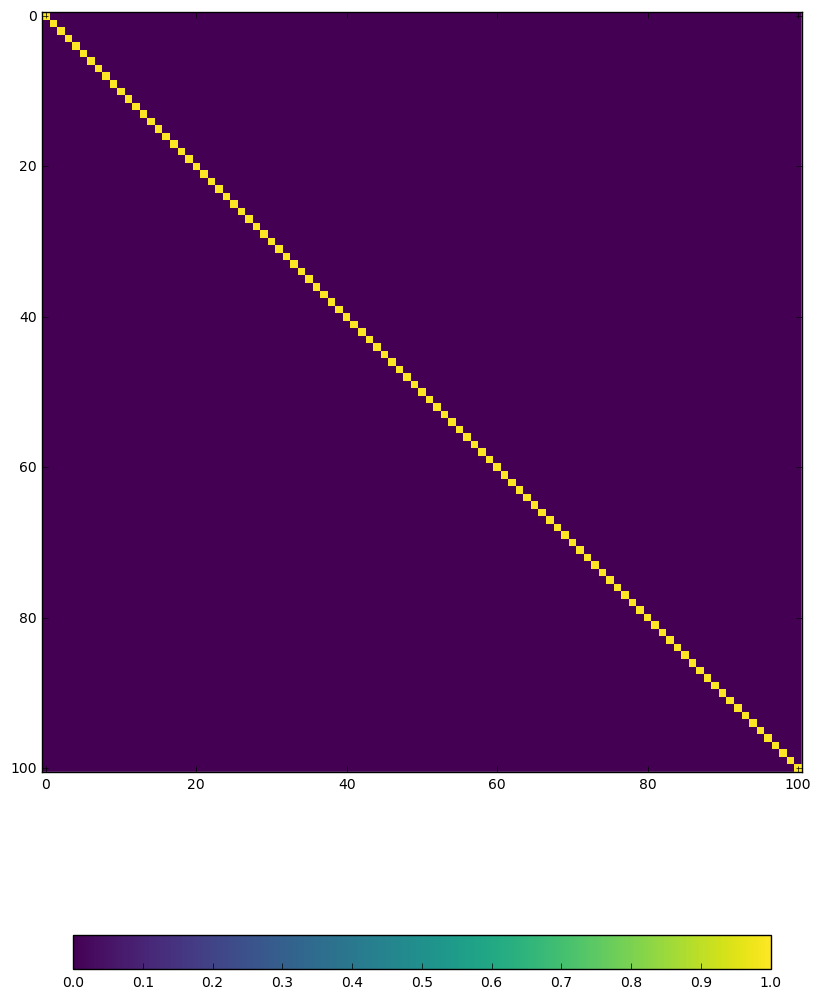

In [54]:
plt.figure(figsize=(18,14))
plt.imshow(b_trad, interpolation='none', cmap='viridis')
plt.colorbar(orientation='horizontal', shrink=.5)
plt.savefig("1.Amatrix_trad.png", dpi=300)

### Command pattern

In [55]:
zpos_trad = off_time(generate_ztrad(n_frames, resolution, resolution, min_z, max_z, alternate=False), resolution, offtime)
aotf_trad = off_time(generate_aotf(b_trad, n_frames), resolution, offtime)
camr_trad = off_time(generate_camera2(resolution, n_frames, resolution), resolution, offtime)
tick_trad = off_time(generate_ticks(resolution, n_frames, resolution), resolution, offtime)
tic2_trad = off_time(generate_ticks2(resolution, n_frames, resolution), resolution, offtime)

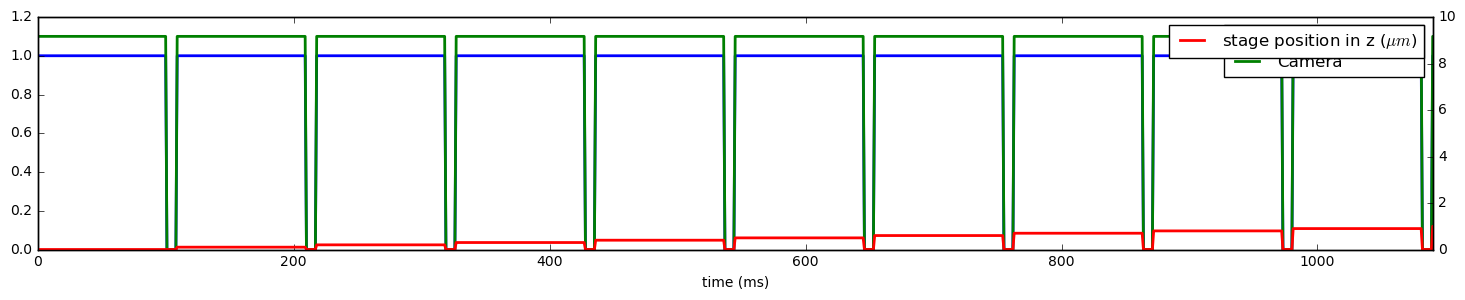

In [56]:
fig, ax1 = plt.subplots(figsize=(18,3))
ax2 = ax1.twinx()

ax1.plot(camr_trad, linewidth=2, label='transmission (%)')
ax1.plot(camr_trad*1.1, linewidth=2, label='Camera')
ax2.plot(zpos_trad, linewidth=2, color='red', label='stage position in z ($\mu m$)')

ax1.set_xlabel('time (ms)')
ax1.legend()
ax2.legend()

plt.xlim((0,camr.shape[0]))
#plt.xlim(0,101*10)
plt.savefig("./1.Patterntrad_begin.pdf")

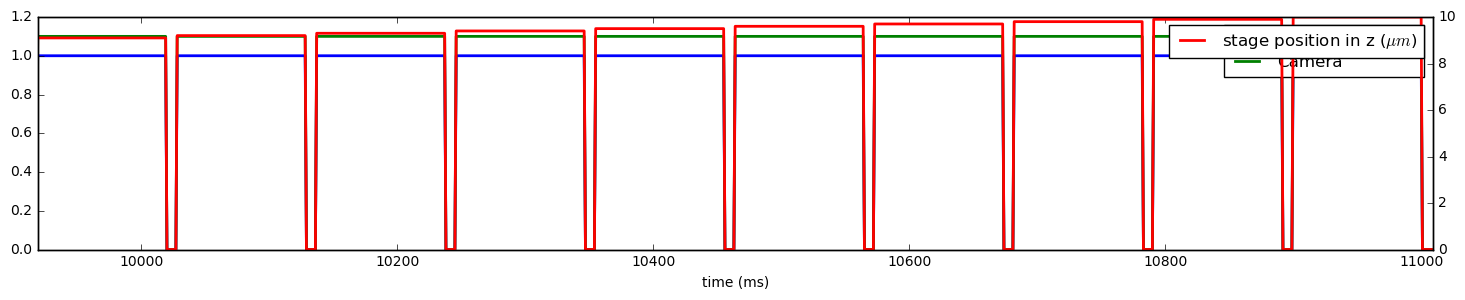

In [57]:
fig, ax1 = plt.subplots(figsize=(18,3))
ax2 = ax1.twinx()

ax1.plot(camr_trad, linewidth=2, label='transmission (%)')
ax1.plot(camr_trad*1.1, linewidth=2, label='Camera')
ax2.plot(zpos_trad, linewidth=2, color='red', label='stage position in z ($\mu m$)')

ax1.set_xlabel('time (ms)')
ax1.legend()
ax2.legend()

plt.xlim((camr_trad.shape[0]-camr.shape[0],camr_trad.shape[0]))
plt.savefig("./1.Patterntrad_end.pdf")

## Old tests

Below a test to plot two axis on the same plot.

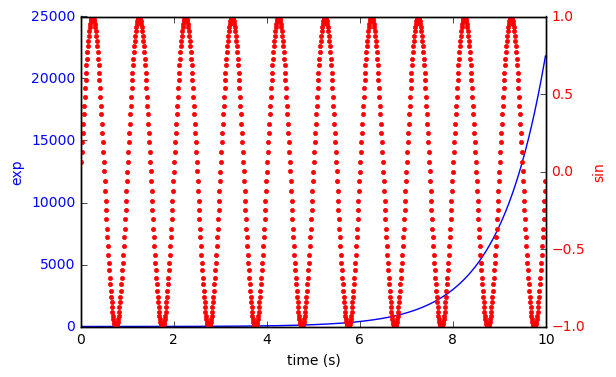

In [87]:
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()
